In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
print(f'{np.__version__}\t\t{pd.__version__}')

sns.set(rc={'figure.figsize':(18, 12)})

1.22.3		1.4.3


                                            Минипроект №1

In [ ]:
# Задания 

#     Первый шаг – загрузить данные и убедиться, что всё считалось правильно:
#         посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить).
#         Также изучите типы переменных.
#     Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики
#         переменной Year.
#     На каких платформах произошло больше всего релизов?
#     Игры каких издателей (Publisher) встречаются в датасете чаще всего?
#     В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
#     Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
#     Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров:
#         Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано
#         больше всего игр жанра Sports?

# Описание данных

# Имеются следующие поля:

#     Rank – место по объему продаж
#     Name – название игры
#     Platform – платформа, на которой выпущена игра
#     Year – год релиза
#     Genre – жанр
#     Publisher – издатель
#     NA_Sales – продажи в Северной Америке, в млн.
#     EU_Sales – продажи в Европе, в млн.
#     JP_Sales – продажи в Японии, в млн.
#     Other_Sales – продажи в остальном мире, в млн.
#     Global_Sales – продажи по всему миру, в млн.



In [11]:
# Первый шаг – загрузить данные и убедиться, что всё считалось правильно:
# посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить).
# Также изучите типы переменных.
games = pd.read_csv('games.csv')
games = games.dropna()
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
games.shape

(16291, 11)

In [13]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

count      39.000000
mean      417.717949
std       450.905344
min         1.000000
25%        19.000000
50%       289.000000
75%       699.500000
max      1431.000000
Name: Year, dtype: float64

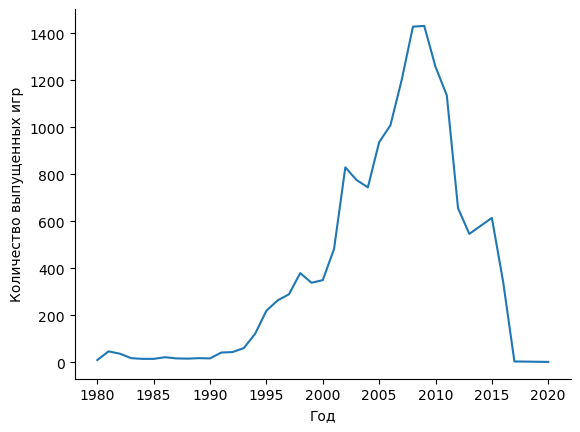

In [40]:
# Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики
# переменной Year.

games_by_years = games.Year.value_counts()
ax = games_by_years.sort_index().plot()
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
sns.despine()
games_by_years.describe()

In [45]:
#  На каких платформах произошло больше всего релизов?
games.Platform.value_counts().idxmax()

'DS'

In [46]:
# Игры каких издателей (Publisher) встречаются в датасете чаще всего?
games.Publisher.value_counts().idxmax()

'Electronic Arts'

In [ ]:
# В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [47]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [51]:
games.query("Publisher == 'Nintendo'")[['NA_Sales', "EU_Sales", "Other_Sales"]].sum().idxmax()

'NA_Sales'

median = 37.915833333333325
mean = 29.189999999999998
interqurtile range = 27.810000000000002


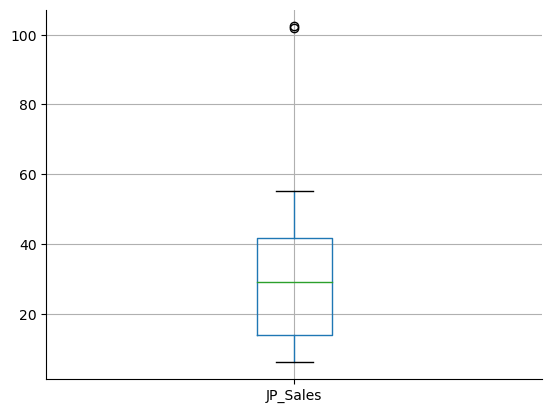

In [79]:
# Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

jp_nintendo = games.query("Publisher == 'Nintendo'")[['Genre', 'JP_Sales']].groupby('Genre').sum()
median, mean, interquartile_range = jp_nintendo.mean(), jp_nintendo.median(), jp_nintendo.quantile(0.75)-jp_nintendo.quantile(0.25)
print(f'median = {median[0]}\nmean = {mean[0]}\ninterqurtile range = {interquartile_range[0]}')
jp_nintendo.boxplot()
sns.despine()

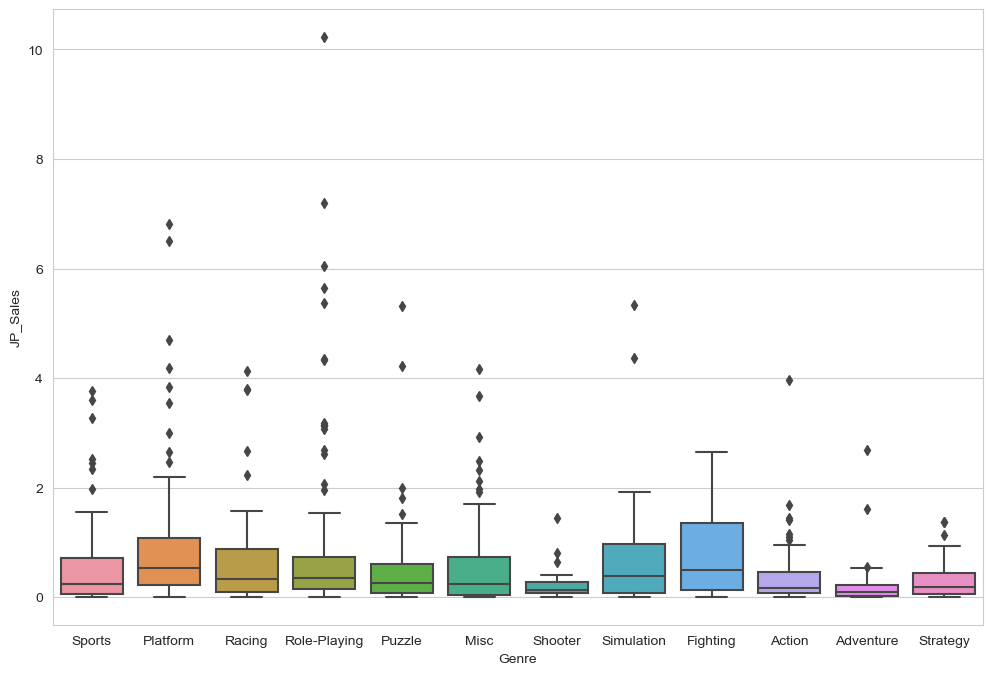

In [90]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=games.query("Publisher == 'Nintendo'"), x='Genre', y='JP_Sales');
sns.set_style('whitegrid')

,Global_Sales
Year,
2009.0,56.67
2006.0,84.62


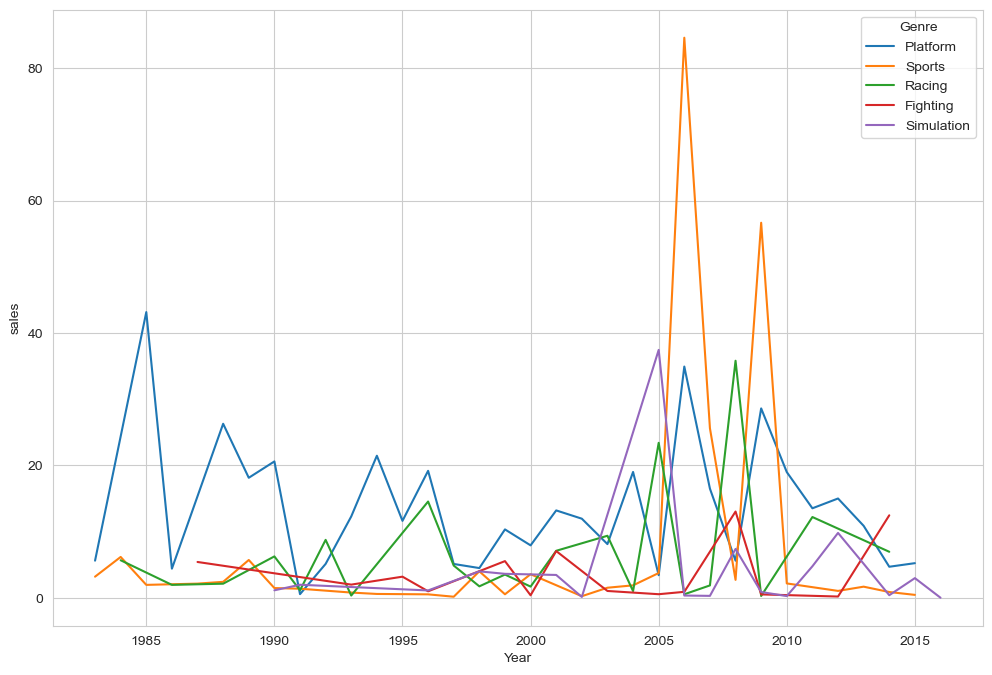

In [155]:
# Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров:
# Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано
# больше всего игр жанра Sports

plt.figure(figsize=(12,8))
filtred = games.query("(Genre == 'Fighting' or Genre == 'Simulation' or Genre == 'Platform' \
            or Genre == 'Racing' or Genre == 'Sports') and Publisher == 'Nintendo'") \
            .groupby(['Year', 'Genre'], as_index=False).agg({'Global_Sales' : 'sum'}) \
            .rename(columns={'Global_Sales' : 'sales'})
sns.lineplot(data=filtred, x='Year', y='sales', hue='Genre')
games.query("(Genre == 'Sports') and (Publisher == 'Nintendo')").groupby("Year").agg({'Global_Sales' : 'sum'}) \
    .sort_values(by='Global_Sales').tail(2)

                                                       Минипроект №2

In [ ]:
# Задание

#     Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений,
#         какие уникальные значения встречаются.
#     Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения
#     Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
#     Проанализируйте CTR с разбивкой по рекламной кампании.
#     Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения,
#         используя меры центральной тенденции и меры изменчивости. 
#     Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
#     Посчитайте конверсию из клика в покупку.

# Описание данных

#     ad_id – идентификатор объявления (рекламы)
#     xyz_campaign_id – идентификатор рекламной кампании в базе компании X
#     fb_campaign_id – идентификатор кампании в Facebook
#     age – возрастная группа, которой показывалась реклама
#     gender – пол тех, кому показывалась реклама
#     interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
#     impressions – число показов
#     clicks – число кликов
#     spent – сумма, которую компания потратила на показ объявления 
#     total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
#     approved_conversion – количество людей, которые купили продукт после просмотра рекламы



In [3]:
# Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений,
# какие уникальные значения встречаются.

conv = pd.read_csv('conversion.csv')
conv.shape

(1143, 11)

In [6]:
conv.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [12]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1332\1720650411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impr.loc[:, 'Impressions'] = np.log(impr.Impressions)


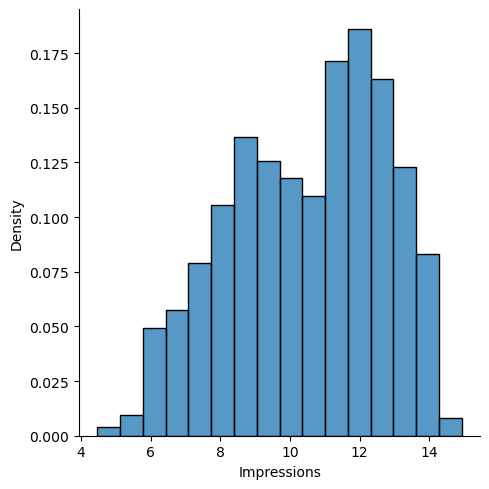

In [59]:
# Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения

impr = conv[['ad_id', 'Impressions']]
impr.loc[:, 'Impressions'] = np.log(impr.Impressions)

sns.displot(data = impr, x='Impressions', kind='hist', stat='density')

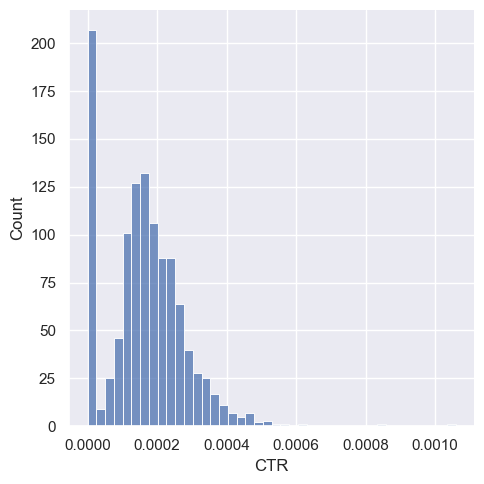

In [87]:
# Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

conv.head()
conv['CTR'] = conv.Clicks/conv.Impressions
conv.CTR.describe()
sns.displot(x=conv.CTR)


<AxesSubplot:xlabel='CTR', ylabel='Count'>

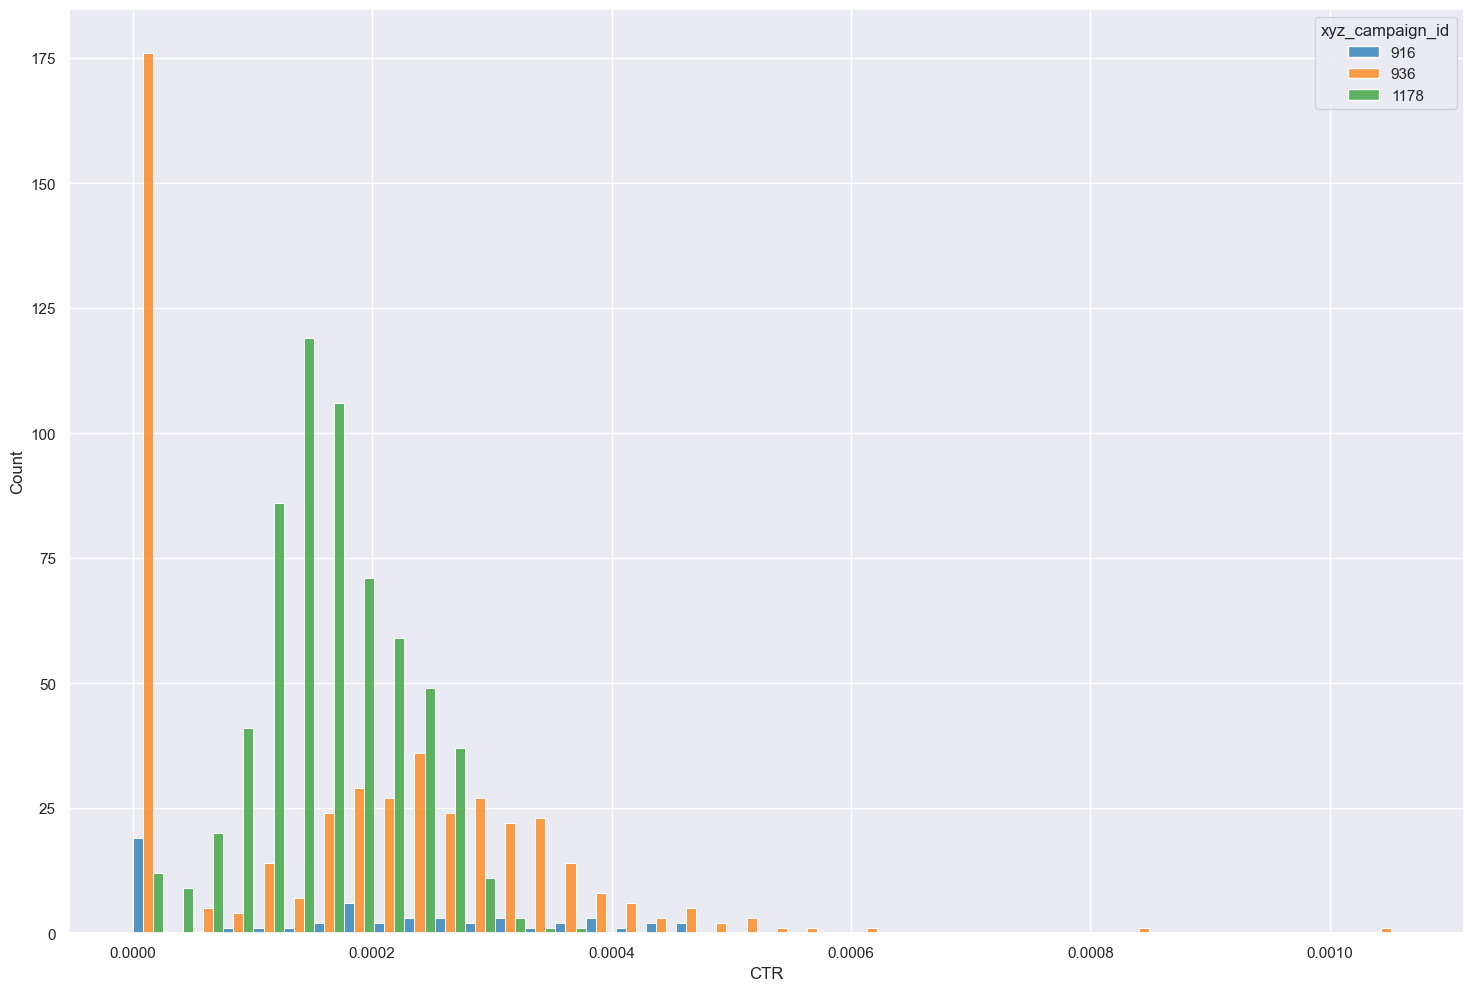

In [95]:
# Проанализируйте CTR с разбивкой по рекламной кампании.

fig, ax = plt.subplots(figsize=(18,12))
sns.histplot(data=conv, x='CTR', hue='xyz_campaign_id', multiple="dodge", ax=ax, palette='tab10')

In [101]:
# Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения,
# используя меры центральной тенденции и меры изменчивости. 

conv['CPC'] = conv.Spent / conv.Clicks
conv.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
dtype: float64

<AxesSubplot:xlabel='CPC', ylabel='Count'>

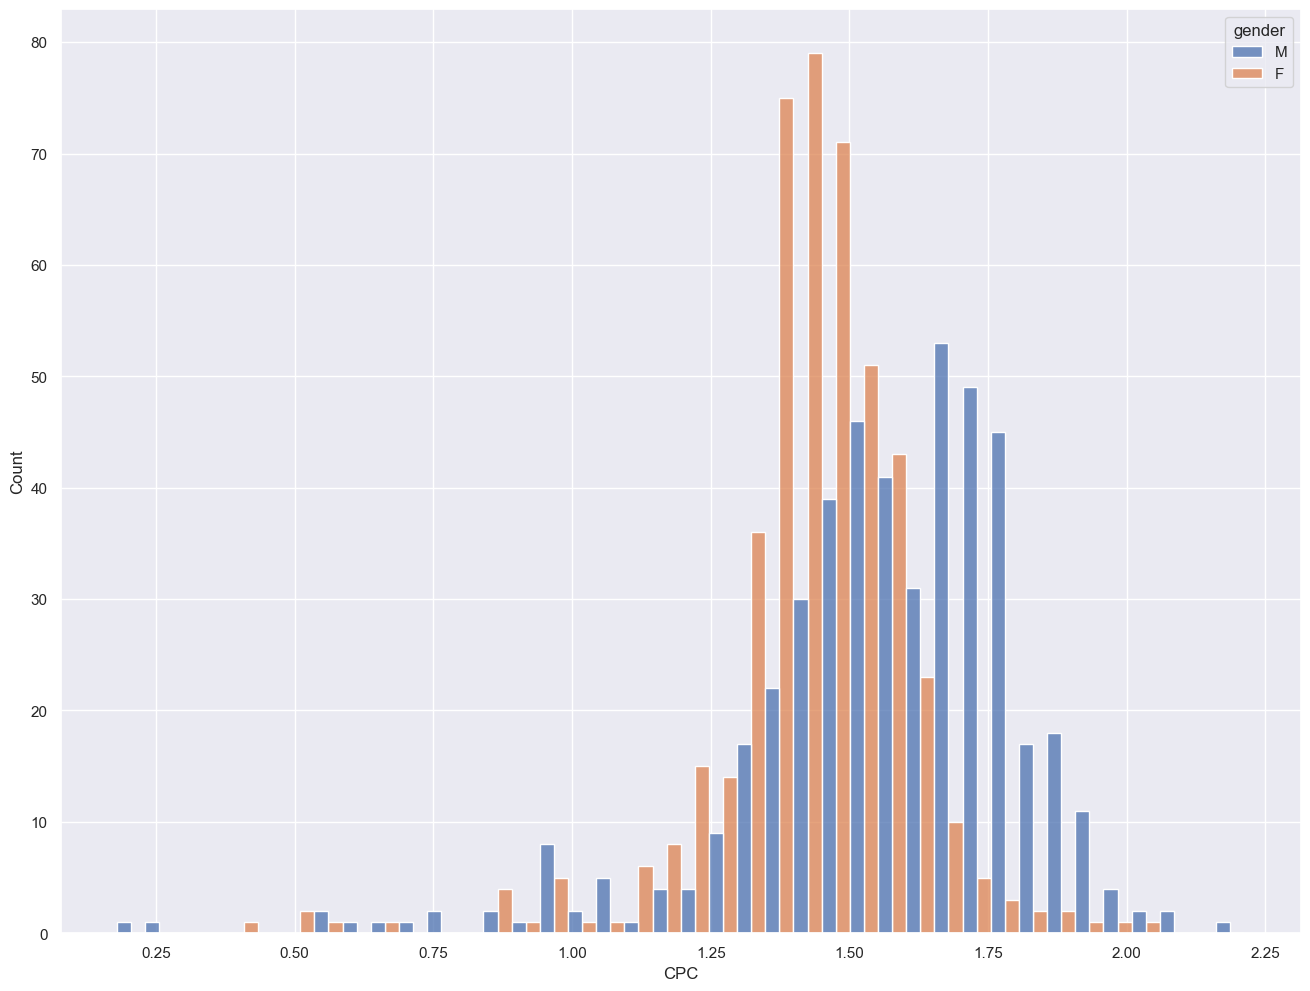

In [112]:
# Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

fig, ax = plt.subplots(figsize=(16,12))
sns.histplot(data=conv, x='CPC', hue='gender', multiple='dodge', ax = ax)

In [114]:
# Посчитайте конверсию из клика в покупку.
conv['click_to_buy'] = conv.Approved_Conversion/conv.Clicks
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,click_to_buy
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


                                                  Минипроект №3

In [ ]:
# Задания

#     Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь,
#         что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
#     Постройте график по числу поездок по дате и времени.
#     Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
#     Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3.
#         В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
#     Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего.
#         Далее – найдите стандартное отклонение.
#     Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

# Описание данных

#     timestamp – дата и время (точность до часа)
#     cnt – количество аренд велосипедов за этот час
#     t1 – температура, в С
#     t2 – температура "ощущается как", в С 
#     hum – влажность (%)
#     wind_speed – скорость ветра, км/ч
#     weather_code – погодные условия
#         1 – ясно (SKC)
#         2 – преимущественно ясно / встречаются отдельные облака (SCT)
#         3 – облачно / значительные облака (BKN)
#         4 – пасмурно (OVC)
#         7 – небольшой дождь Rain/ light Rain shower/ Light rain 
#         10 – дождь с грозой
#         26 – снегопад 
#         94 – ледяной туман (да, такое бывает!)
#     isholiday – является ли день праздником (1 – праздник, 0 – нет)
#     isweekend –  является ли день выходным (1 – выходной, 0 – нет)
#     season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)



In [10]:
# Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь,
# что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

london = pd.read_csv('london.csv', parse_dates=['timestamp'])
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [11]:
london.shape

(17414, 10)

In [12]:
london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [13]:
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

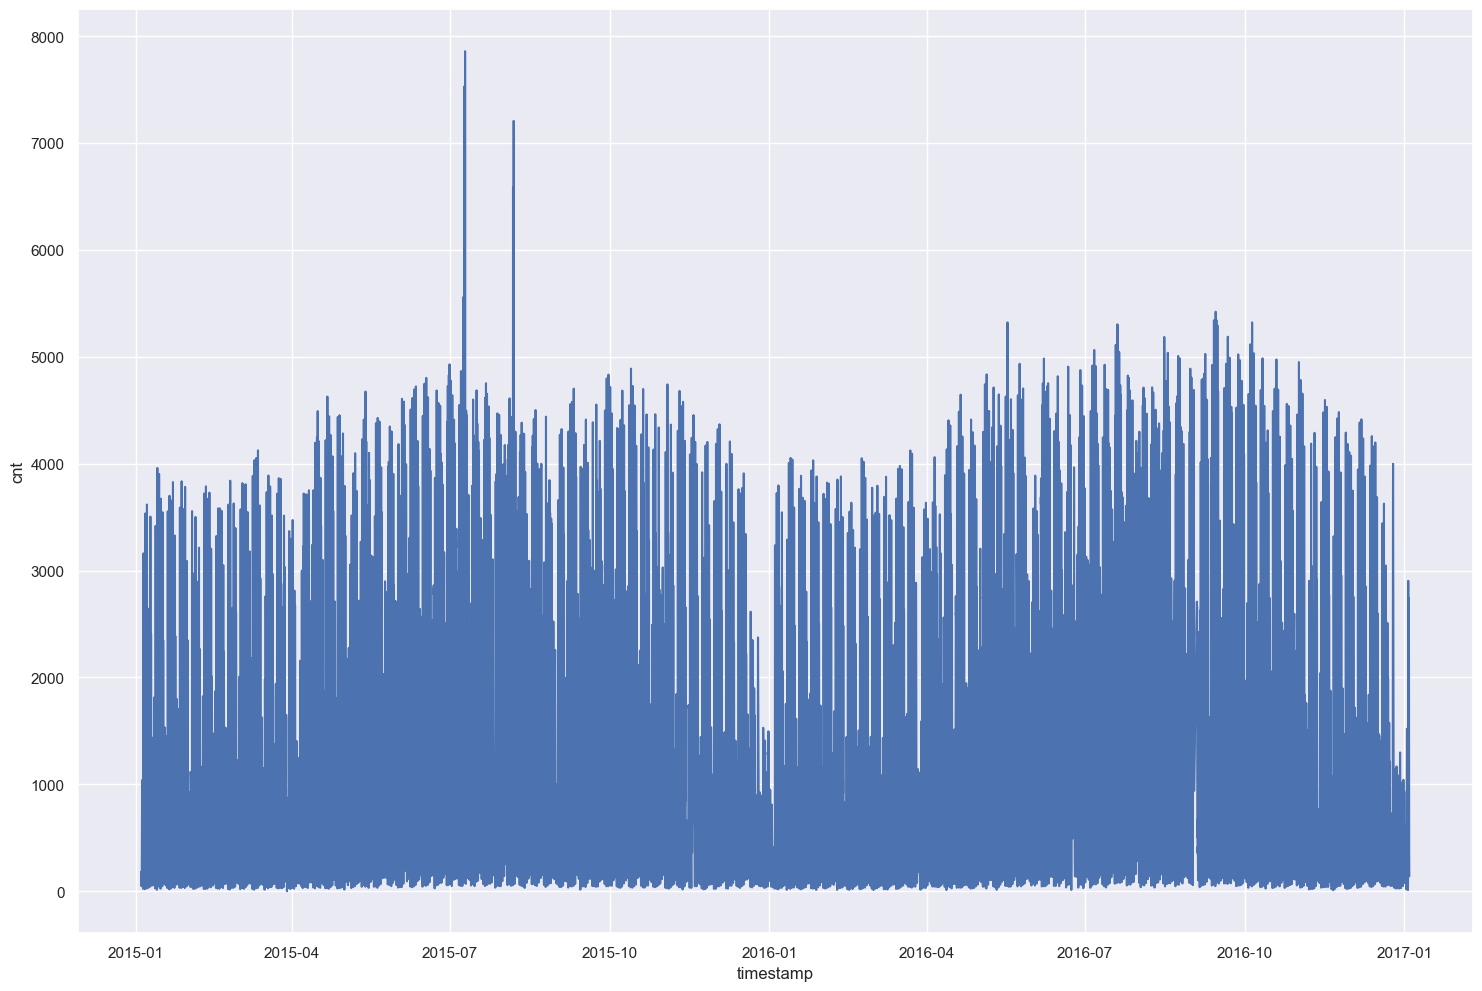

In [18]:
# Постройте график по числу поездок по дате и времени.

sns.lineplot(data=london, x='timestamp', y='cnt');

<AxesSubplot:xlabel='timestamp'>

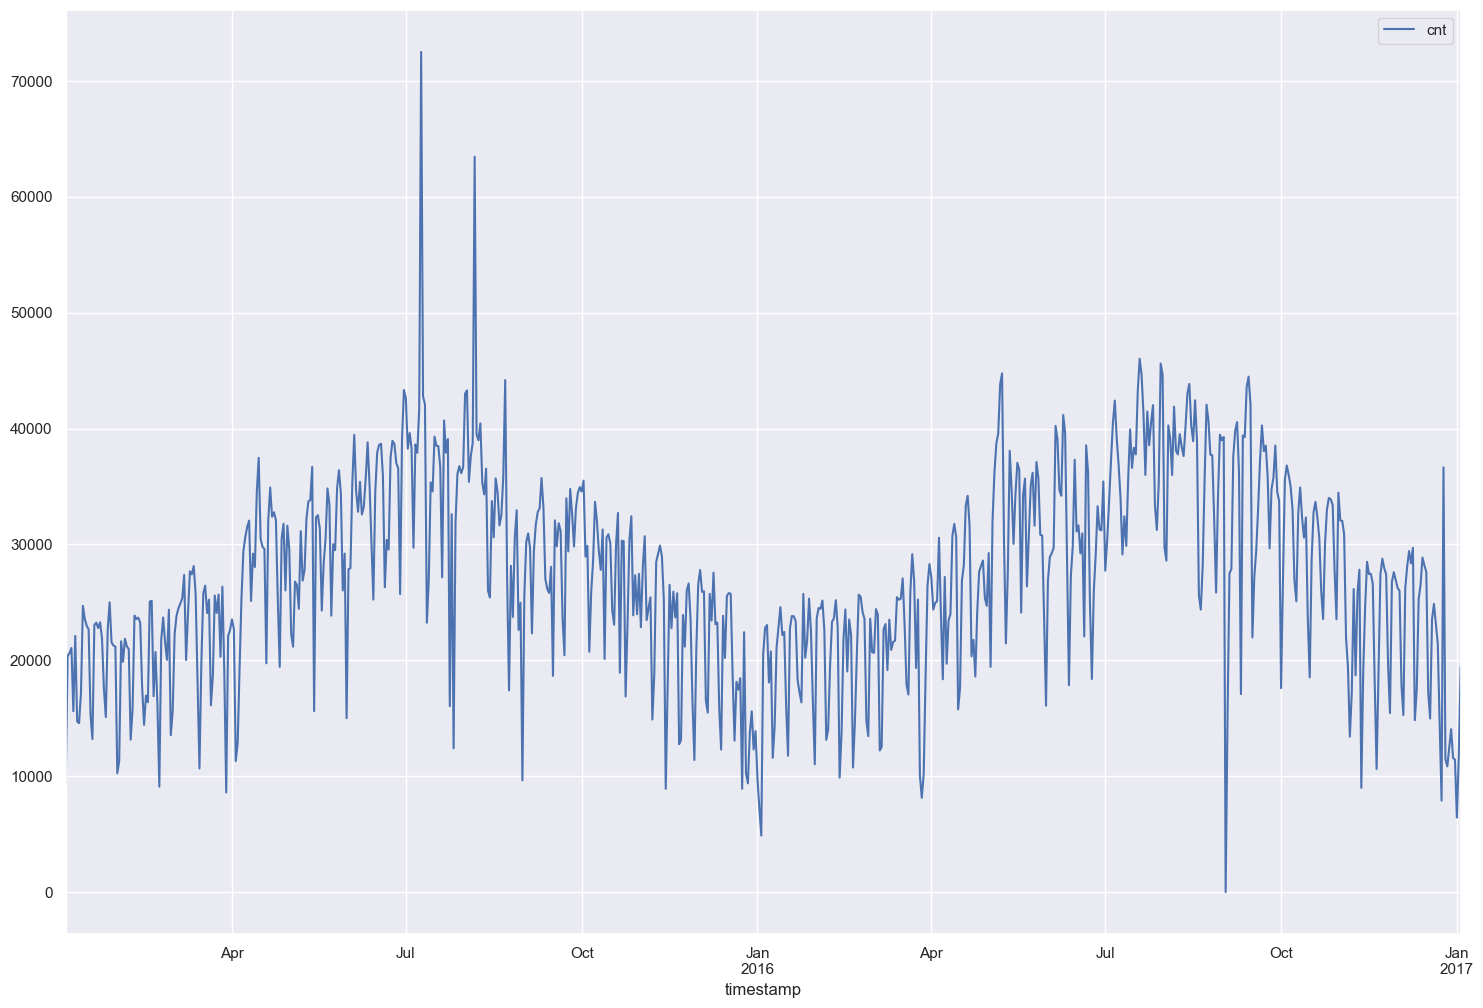

In [40]:
# Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.


# london.set_index('timestamp', inplace=True)
london.resample('D').agg({'cnt' : 'sum'}).plot()

cnt    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

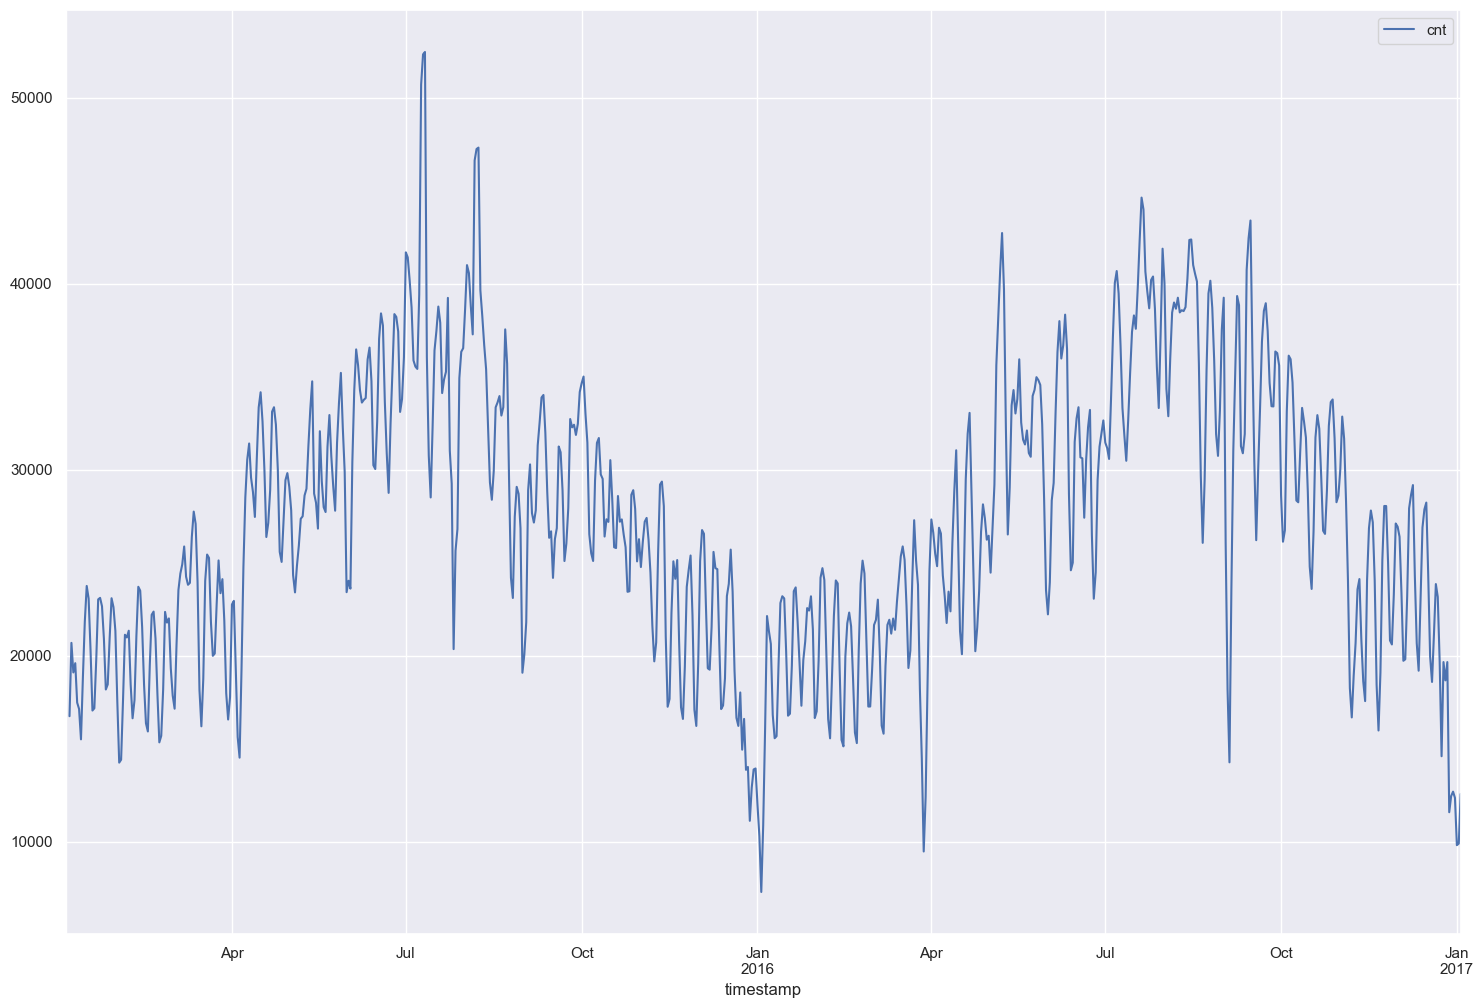

In [65]:
# Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3.
# В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
london_rolling = london.resample('D').agg({'cnt' : 'sum'}).rolling(3).mean()
london_rolling.plot()
london_rolling.loc['2015-07-09']


In [85]:
# Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего.
# Далее – найдите стандартное отклонение.

cnt_delta = (london.resample('D').agg({'cnt' : 'sum'}).cnt -  london_rolling.cnt).to_frame() \
    .rename(columns={'cnt' : 'delta'})
std = round(np.std(cnt_delta.delta), 2)
std

4558.59

In [90]:
# Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

mu = np.mean(cnt_delta.delta)
mu, std
lower_bound = london_rolling.cnt - 2.576 * std
upper_bound = london_rolling.cnt + 2.576 * std
london_rolling['lower_bound'] = lower_bound
london_rolling['upper_bound'] = upper_bound
london_rolling

,cnt,lower_bound,upper_bound
timestamp,,,
2015-01-04,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,16739.666667,4996.738827,28482.594507
2015-01-07,20683.000000,8940.072160,32425.927840
2015-01-08,19092.666667,7349.738827,30835.594507
...,...,...,...
2016-12-30,12682.000000,939.072160,24424.927840
2016-12-31,12347.333333,604.405493,24090.261173
2017-01-01,9803.666667,-1939.261173,21546.594507


                                                   Задачи №4

In [7]:
m_male = 45
sd_male = 9
m_woman = 34
sd_woman = 10

ci95_male = (m_male - 1.96 * sd_male / 10, m_male + 1.96 * sd_male / 10)
ci95_woman = (m_woman - 1.96 * sd_woman / 10, m_woman + 1.96 * sd_woman / 10)

print(ci95_male, ci95_woman)

(43.236, 46.764) (32.04, 35.96)


                                                Минипроект №4

In [ ]:
# Задание

# Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров
# (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

# У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема,
# к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов
# лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

# Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние
# заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть,
# чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

# Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров.
# Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию
# и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение
# о раскатке новой фичи на всех курьеров.

# Описание данных

#     order_id - id заказа
#     delivery_time - время доставки в минутах
#     district - район доставки
#     experiment_group - экспериментальная группа



In [30]:
df = pd.read_csv('experiment_lesson_4.csv')

df_control = df.query("experiment_group == 'control'")
df_test = df.query("experiment_group == 'test'")

mean_control = df_control.delivery_time.mean()
mean_test = df_test.delivery_time.mean()

std_control = df_control.delivery_time.std()
std_test = df_test.delivery_time.std()

n_control = df_control.shape[0]
n_test = df_test.shape[0]

print(n_control, n_test)

10092 10104


In [34]:
ci99_control = (mean_control - 2.58 * std_control/n_control**2, mean_control + 2.58 * std_control/n_control**2)
ci99_test = (mean_test - 2.58 * std_test/n_test**2, mean_test + 2.58 * std_test/n_test**2)
ci99_control, ci99_test

((45.06510081708995, 45.0651013232192),
 (39.046812893542395, 39.04681339307676))

<AxesSubplot:xlabel='delivery_time', ylabel='Count'>

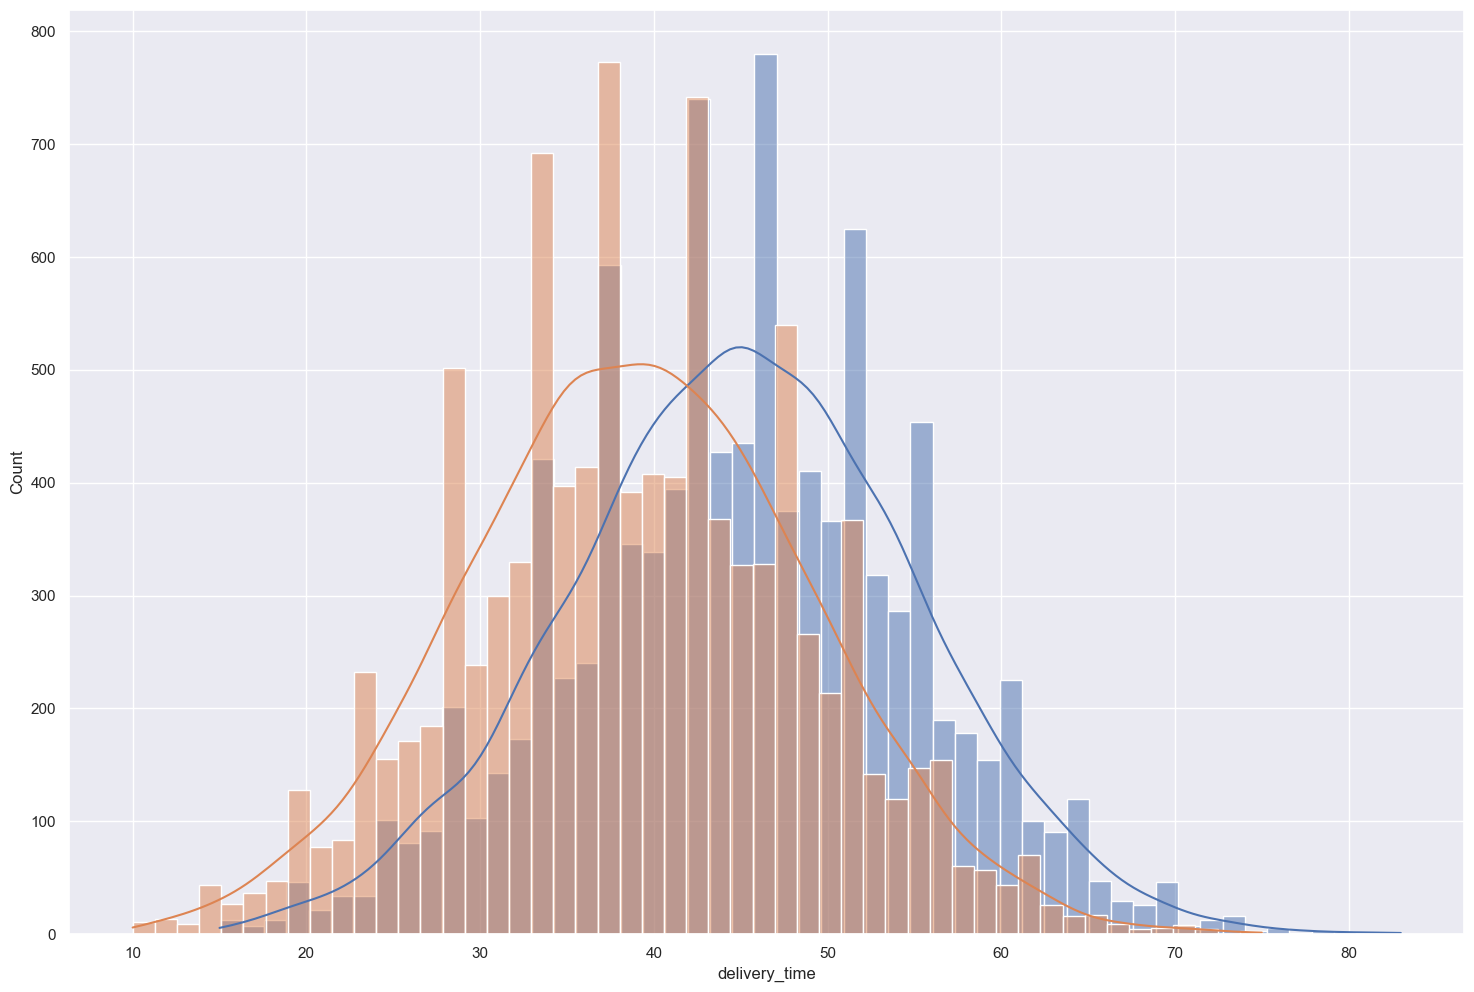

In [27]:
sns.histplot(x=df_control.delivery_time, kde=True)
sns.histplot(x=df_test.delivery_time, kde=True)

In [35]:
sp.stats.ttest_ind(df_test.delivery_time, df_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [7]:
sample_control = [3] * 30 + [10] * 30 + [200] * 10 + [1200]
sample_control = np.array(sample_control) + sp.stats.norm().rvs(len(sample_control))
sample_control

array([2.57903848e+00, 4.78445477e+00, 4.37605627e+00, 1.86239076e+00,
       1.65953442e+00, 7.83361367e-01, 2.77247668e+00, 2.15486595e+00,
       2.90225859e+00, 3.69346623e+00, 2.99779791e+00, 3.03447721e+00,
       2.14560648e+00, 4.36058970e+00, 2.47265137e+00, 3.32759785e+00,
       2.06662587e+00, 4.42870442e+00, 2.47383169e+00, 4.09018018e+00,
       1.75593128e+00, 3.01111420e+00, 1.76679742e+00, 3.02972283e+00,
       2.47762238e+00, 2.25978879e+00, 3.63444658e+00, 3.82858830e+00,
       4.02689007e+00, 2.81337015e+00, 9.99813363e+00, 9.75837251e+00,
       9.21503274e+00, 1.25828921e+01, 1.02641607e+01, 1.12266219e+01,
       9.42507968e+00, 1.05975787e+01, 9.49450497e+00, 1.12850893e+01,
       1.28980056e+01, 1.02185607e+01, 9.31294433e+00, 1.14586188e+01,
       9.81166892e+00, 9.43638238e+00, 1.08956760e+01, 8.77374824e+00,
       9.69266494e+00, 8.14217536e+00, 8.16345079e+00, 9.88229228e+00,
       1.10840703e+01, 7.56494565e+00, 1.05615072e+01, 9.11168995e+00,
      